In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os

In [3]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [4]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [5]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

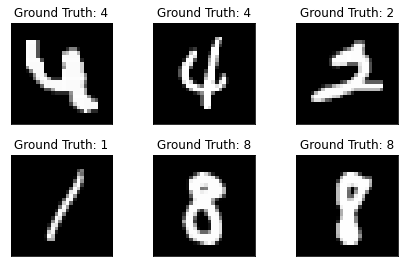

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])


In [7]:
fft_exmpl = torch.fft.fft2(example_data, norm="forward")
fft_exmpl_centered = torch.fft.fftshift(fft_exmpl)
fft_exmpl_centered_magnitude = torch.abs(fft_exmpl_centered)
fft_exmpl_magnitude = torch.abs(fft_exmpl)
fft_exmpl_angle = torch.angle(fft_exmpl)

torch.Size([1000, 1, 28, 28, 2])

In [21]:
recon_anlgne = fft_exmpl_magnitude*torch.exp(torch.view_as_complex(torch.stack([torch.zeros_like(fft_exmpl_angle),fft_exmpl_angle], -1)))

In [24]:
torch.abs(recon_anlgne - fft_exmpl).max()

tensor(6.6640e-08)

In [48]:
fft_exmpl_angle.min(), fft_exmpl_angle.max()

(tensor(-3.1416), tensor(3.1416))

In [60]:
phase_noise = torch.normal(0.0, 0.5, size=fft_exmpl_angle.shape)

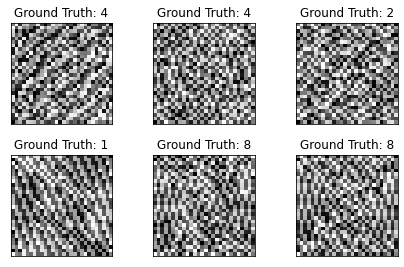

In [64]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(fft_exmpl_angle[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])5

In [61]:
fft_exmpl_angle_noised = fft_exmpl_angle + phase_noise
fft_exmp_phase_noised = torch.polar(fft_exmpl_magnitude, fft_exmpl_angle_noised)
example_data_recon = torch.fft.ifft2(fft_exmp_phase_noised, norm="forward")

In [85]:
phase_nnoise_shift = -4.5*torch.ones_like(example_data)
fft_exmpl_angle_noised = fft_exmpl_angle + phase_nnoise_shift
fft_exmp_phase_noised = torch.polar(fft_exmpl_magnitude, fft_exmpl_angle_noised)
example_data_recon = torch.fft.ifft2(fft_exmp_phase_noised, norm="forward")

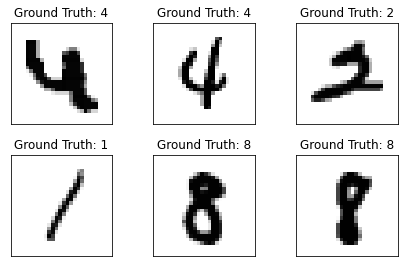

In [86]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data_recon[i][0].real, cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

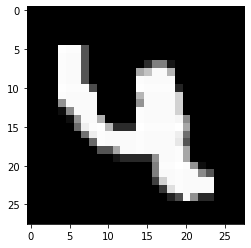

In [8]:
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')

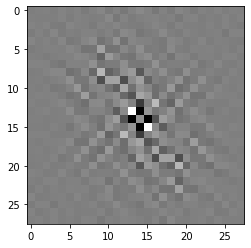

In [9]:
plt.imshow(fft_exmpl_centered_re[0][0], cmap='gray', interpolation='none')

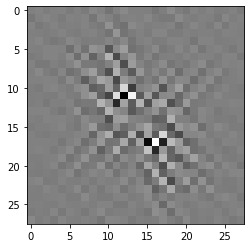

In [10]:
plt.imshow(fft_exmpl_centered_im[0][0], cmap='gray', interpolation='none')

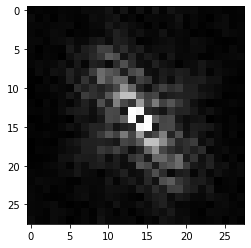

In [11]:
plt.imshow(torch.sqrt(fft_exmpl_centered_abs[0][0]), cmap='gray', interpolation='none')

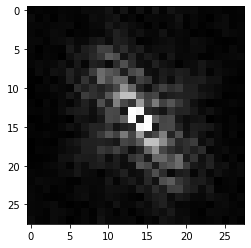

In [12]:
plt.imshow(fft_exmpl_centered_magnitude[0][0], cmap='gray', interpolation='none')

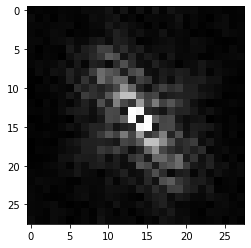

In [13]:
plt.imshow(fft_exmpl_centered[0][0].abs(), cmap='gray', interpolation='none')

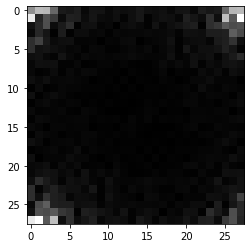

In [14]:
plt.imshow(fft_exmpl_magnitude[0][0], cmap='gray', interpolation='none')

In [15]:
(torch.sqrt(fft_exmpl_centered_abs[0][0]) - fft_exmpl_centered[0][0].abs()).max()

tensor(0.)

In [16]:
torch.view_as_real(fft_exmpl).min(), torch.view_as_real(fft_exmpl).max(), torch.view_as_real(fft_exmpl).mean()

(tensor(-0.6197), tensor(0.5322), tensor(-0.0003))

In [17]:
fft_exmpl_centered_magnitude.mean()

tensor(0.0182)

In [18]:
fft_exmpl_centered_magnitude.shape, fft_exmpl_centered_magnitude.max(), example_data[i][0].max()

(torch.Size([1000, 1, 28, 28]), tensor(0.6206), tensor(2.8215))

In [19]:
fft_exmpl_centered_magnitude.max(), fft_exmpl_centered_magnitude.mean(), fft_exmpl_centered_magnitude.min()

(tensor(0.6206), tensor(0.0182), tensor(3.7253e-09))

In [20]:
example_data.max(), example_data.min(), example_data.mean()

(tensor(2.8215), tensor(-0.4242), tensor(0.0054))

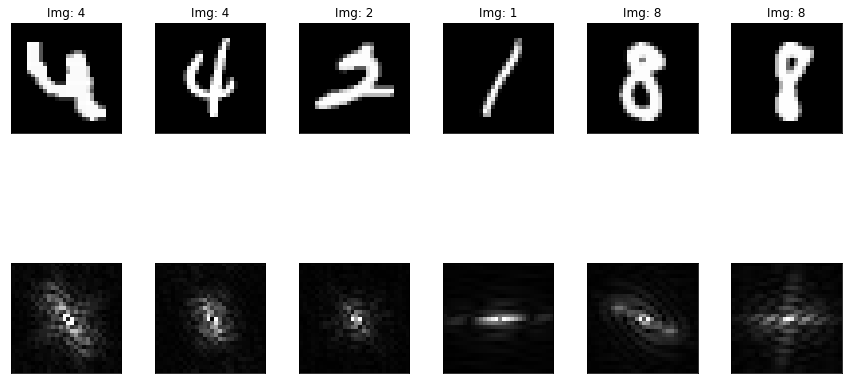

In [21]:
fig = plt.figure(figsize=(12,8))
ind =1
num=6
for i in range(num):
  plt.subplot(2,num,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Img: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

  plt.subplot(2,num,num+i+1)
  plt.tight_layout()
  plt.imshow(fft_exmpl_centered_magnitude[i][0], cmap='gray', interpolation='none')
#   plt.title("FFT magn: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
  ind += 2


In [22]:
class ConvNetMnistClasif(nn.Module):
    def __init__(self):
        super(ConvNetMnistClasif, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [23]:
F.leaky_relu

<function torch.nn.functional.leaky_relu(input: torch.Tensor, negative_slope: float = 0.01, inplace: bool = False) -> torch.Tensor>

In [24]:
class FCNetMagnitudeMnistClasif(nn.Module):
    def __init__(self, use_bn: bool = False, use_dropout: bool = False):
        super(FCNetMagnitudeMnistClasif, self).__init__()
        self.use_dropout=use_dropout
        self.in_channels = 28**2
        
        self.fc1 = nn.Linear(self.in_channels, 512)
        
        self.bn1 = nn.BatchNorm1d(512) #if use_bn else nn.Identity(512)
        
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256) #if use_bn else nn.Identity(256)
        
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128) #if use_bn else nn.Identity(128)
        
        self.fc4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64) #if use_bn else nn.Identity(64)
        
        self.fc5 = nn.Linear(64, 10)
        
        self.activ = F.relu

    def forward(self, x):
        x = x.view(-1, self.in_channels)

        x = self.fc1(x)
        x = self.activ(x)
        if self.use_dropout:
            x = F.dropout(x, training=self.training)
        
        x = self.fc2(x)
#         x = self.bn2(x)
        x = self.activ(x)
        if self.use_dropout:
            x = F.dropout(x, training=self.training)

        x = self.fc3(x)
#         x = self.bn3(x)
        x = self.activ(x)
        if self.use_dropout:
            x = F.dropout(x, training=self.training)

        x = self.fc4(x)
#         x = self.bn4(x)
        x = self.activ(x)
        if self.use_dropout:
            x = F.dropout(x, training=self.training)

        x = self.fc5(x)
        return F.log_softmax(x)

In [25]:
conv_net_classif = ConvNetMnistClasif()
optimizer_convnet = optim.SGD(conv_net_classif.parameters(), lr=learning_rate,
                      momentum=momentum)

fc_magnitude_classif = FCNetMagnitudeMnistClasif()
optimizer_fc_magnitude = optim.SGD(fc_magnitude_classif.parameters(), lr=learning_rate,
                      momentum=momentum)

In [26]:
def prepare_data(data_batch):
    data_batch = torch.fft.fft2(data_batch, norm="ortho")
    data_batch = torch.fft.fftshift(data_batch, dim=(-2, -1))
#     data_batch = torch.view_as_real(data_batch)
    data_batch = torch.abs(data_batch)
    return data_batch


In [27]:
prepare_data(iter(train_loader).next()[0]).min(), prepare_data(iter(train_loader).next()[0]).max(), prepare_data(iter(train_loader).next()[0]).mean()

(tensor(0.0012), tensor(11.2824), tensor(0.4915))

In [28]:
fc_magnitude_classif(prepare_data(iter(train_loader).next()[0])).shape

<ipython-input-24-09ff3429a56a>:51: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


torch.Size([64, 10])

In [29]:
iter(train_loader).next()[0].shape, iter(train_loader).next()[1].shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [30]:
data_batch = iter(train_loader).next()[0]
data_batch_reorded = torch.fft.fftshift(data_batch, dim=(-2,-1))
data_reval = data_batch.view(-1, 28 ** 2)
data_img = data_reval.view(64, 28, 28)

In [31]:
data_batch_reorded.shape

torch.Size([64, 1, 28, 28])

In [32]:
prepare_data(iter(train_loader).next()[0]).shape

torch.Size([64, 1, 28, 28])

In [33]:
prepare_data(iter(train_loader).next()[0]).view(-1, 2*28**2).shape

torch.Size([32, 1568])

In [34]:
iter(train_loader).next()[0].view(-1, 28**2).shape

torch.Size([64, 784])

In [36]:
def test(network: nn.Module):
    test_losses = []
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = prepare_data(data)
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    acc = correct / len(test_loader.dataset)
    print(f'Test set: Avg. loss: {test_loss:.4f}, Accuracy: {acc:.4%}')
    return test_losses


In [37]:
def train_net(net_model: nn.Module, optimizer, epoch: int):
    train_losses = []
    train_counter = []
    net_model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = prepare_data(data)
        output = net_model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
          print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}'
                f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

          train_losses.append(loss.item())
          train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    return train_losses, train_counter

In [38]:
def run_train(net_model: nn.Module, optimizer):
    test(net_model)
    train_losses = []
    train_counter = []
    for epoch in range(1, n_epochs + 1):
            train_losses_batch, train_counter_batch = train_net(net_model, optimizer, epoch)
            train_losses += train_losses_batch
            train_counter += train_counter_batch
            test_losses_batch = test(net_model)
    return train_losses, train_counter, test_losses_batch

In [39]:
train_losses_convnet, train_counter_convnet, test_losses_batch_convnet = run_train(conv_net_classif, 
                                                                                   optimizer_convnet)

<ipython-input-22-de4dacbab297>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/leongugel/.envs/phase-retrieval-env/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Avg. loss: 2.3083, Accuracy: 10.1700%
Train Epoch: 1 [0/60000(0%)]	Loss: 2.330635
Train Epoch: 1 [640/60000(1%)]	Loss: 2.336226
Train Epoch: 1 [1280/60000(2%)]	Loss: 2.302186
Train Epoch: 1 [1920/60000(3%)]	Loss: 2.308815
Train Epoch: 1 [2560/60000(4%)]	Loss: 2.282254
Train Epoch: 1 [3200/60000(5%)]	Loss: 2.290586
Train Epoch: 1 [3840/60000(6%)]	Loss: 2.252647
Train Epoch: 1 [4480/60000(7%)]	Loss: 2.286245
Train Epoch: 1 [5120/60000(9%)]	Loss: 2.226766
Train Epoch: 1 [5760/60000(10%)]	Loss: 2.239878
Train Epoch: 1 [6400/60000(11%)]	Loss: 2.259570
Train Epoch: 1 [7040/60000(12%)]	Loss: 2.195829
Train Epoch: 1 [7680/60000(13%)]	Loss: 2.186335
Train Epoch: 1 [8320/60000(14%)]	Loss: 2.251987
Train Epoch: 1 [8960/60000(15%)]	Loss: 2.163282
Train Epoch: 1 [9600/60000(16%)]	Loss: 2.181654
Train Epoch: 1 [10240/60000(17%)]	Loss: 2.110543
Train Epoch: 1 [10880/60000(18%)]	Loss: 2.081900
Train Epoch: 1 [11520/60000(19%)]	Loss: 2.065691
Train Epoch: 1 [12160/60000(20%)]	Loss: 2.007045
T

Train Epoch: 2 [46720/60000(78%)]	Loss: 0.705798
Train Epoch: 2 [47360/60000(79%)]	Loss: 0.652718
Train Epoch: 2 [48000/60000(80%)]	Loss: 0.847989
Train Epoch: 2 [48640/60000(81%)]	Loss: 0.602818
Train Epoch: 2 [49280/60000(82%)]	Loss: 0.660225
Train Epoch: 2 [49920/60000(83%)]	Loss: 0.621711
Train Epoch: 2 [50560/60000(84%)]	Loss: 0.763965
Train Epoch: 2 [51200/60000(85%)]	Loss: 1.114589
Train Epoch: 2 [51840/60000(86%)]	Loss: 0.599978
Train Epoch: 2 [52480/60000(87%)]	Loss: 1.028501
Train Epoch: 2 [53120/60000(88%)]	Loss: 0.734663
Train Epoch: 2 [53760/60000(90%)]	Loss: 0.903963
Train Epoch: 2 [54400/60000(91%)]	Loss: 0.836457
Train Epoch: 2 [55040/60000(92%)]	Loss: 0.642053
Train Epoch: 2 [55680/60000(93%)]	Loss: 0.761774
Train Epoch: 2 [56320/60000(94%)]	Loss: 0.667260
Train Epoch: 2 [56960/60000(95%)]	Loss: 0.834991
Train Epoch: 2 [57600/60000(96%)]	Loss: 0.963232
Train Epoch: 2 [58240/60000(97%)]	Loss: 0.872665
Train Epoch: 2 [58880/60000(98%)]	Loss: 0.887949
Train Epoch: 2 [5952

In [40]:
train_losses_fc, train_counter_fc, test_losses_batch_fc = run_train(fc_magnitude_classif, optimizer_fc_magnitude)

<ipython-input-24-09ff3429a56a>:51: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Test set: Avg. loss: 2.3043, Accuracy: 8.8700%
Train Epoch: 1 [0/60000(0%)]	Loss: 2.305659
Train Epoch: 1 [640/60000(1%)]	Loss: 2.301692
Train Epoch: 1 [1280/60000(2%)]	Loss: 2.304650
Train Epoch: 1 [1920/60000(3%)]	Loss: 2.306514
Train Epoch: 1 [2560/60000(4%)]	Loss: 2.297360
Train Epoch: 1 [3200/60000(5%)]	Loss: 2.290855
Train Epoch: 1 [3840/60000(6%)]	Loss: 2.289414
Train Epoch: 1 [4480/60000(7%)]	Loss: 2.292210
Train Epoch: 1 [5120/60000(9%)]	Loss: 2.278623
Train Epoch: 1 [5760/60000(10%)]	Loss: 2.298361
Train Epoch: 1 [6400/60000(11%)]	Loss: 2.295089
Train Epoch: 1 [7040/60000(12%)]	Loss: 2.289698
Train Epoch: 1 [7680/60000(13%)]	Loss: 2.284716
Train Epoch: 1 [8320/60000(14%)]	Loss: 2.287018
Train Epoch: 1 [8960/60000(15%)]	Loss: 2.293082
Train Epoch: 1 [9600/60000(16%)]	Loss: 2.284069
Train Epoch: 1 [10240/60000(17%)]	Loss: 2.276070
Train Epoch: 1 [10880/60000(18%)]	Loss: 2.280892
Train Epoch: 1 [11520/60000(19%)]	Loss: 2.273235
Train Epoch: 1 [12160/60000(20%)]	Loss: 2.264070
Tr

Train Epoch: 2 [46720/60000(78%)]	Loss: 0.641559
Train Epoch: 2 [47360/60000(79%)]	Loss: 0.465969
Train Epoch: 2 [48000/60000(80%)]	Loss: 0.622374
Train Epoch: 2 [48640/60000(81%)]	Loss: 0.480872
Train Epoch: 2 [49280/60000(82%)]	Loss: 0.512363
Train Epoch: 2 [49920/60000(83%)]	Loss: 0.507243
Train Epoch: 2 [50560/60000(84%)]	Loss: 0.478519
Train Epoch: 2 [51200/60000(85%)]	Loss: 0.704569
Train Epoch: 2 [51840/60000(86%)]	Loss: 0.402206
Train Epoch: 2 [52480/60000(87%)]	Loss: 0.671287
Train Epoch: 2 [53120/60000(88%)]	Loss: 0.620629
Train Epoch: 2 [53760/60000(90%)]	Loss: 0.607760
Train Epoch: 2 [54400/60000(91%)]	Loss: 0.648260
Train Epoch: 2 [55040/60000(92%)]	Loss: 0.685881
Train Epoch: 2 [55680/60000(93%)]	Loss: 0.475090
Train Epoch: 2 [56320/60000(94%)]	Loss: 0.446976
Train Epoch: 2 [56960/60000(95%)]	Loss: 0.446608
Train Epoch: 2 [57600/60000(96%)]	Loss: 0.362868
Train Epoch: 2 [58240/60000(97%)]	Loss: 0.823542
Train Epoch: 2 [58880/60000(98%)]	Loss: 0.588790
Train Epoch: 2 [5952

In [41]:
len(train_loader)

938

In [ ]:
 output.backward()